# Credit Card Fraud Detection
### Objectives
* Find the best model of Credit Card Fraud Prediction
* Compare Features importance
* Resampling Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import os

# Load Train and Test dataset

In [2]:
cc_original_train_df = pd.read_csv("/Users/diegoperezo97/Documents/Bedu – Data Analysis/proyecto-final/recursos/fraudTest.csv", index_col="Unnamed: 0")
cc_original_test_df = pd.read_csv("/Users/diegoperezo97/Documents/Bedu – Data Analysis/proyecto-final/recursos/fraudTrain.csv", index_col="Unnamed: 0")

Check data description and null value of train data

In [3]:
cc_original_train_df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
cc_original_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [5]:
cc_original_train_df.isnull().sum() #Count Null Value each feature

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Note: This train data set don't have null value, All features and target have 1296675.

# Data Visualization
Check relationship between features and target

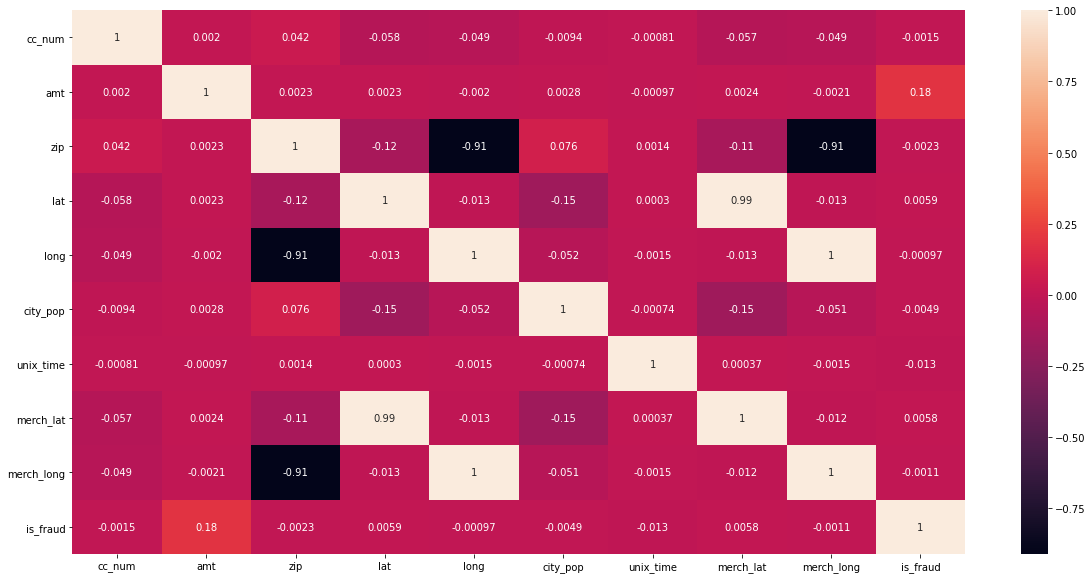

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(cc_original_train_df.corr(), annot=True)
plt.show()

Note: From heatmap amount has highly correlated with is_fraud

(Heatmap if value close to 1 and color close to white meaning 2 features have highly correlated)

### Questions
1. Who was scammed with the most amount and what is gender?
2. How much amount that has been scammed the most?
3. What is gender that has been scammed the most?
4. What type of category that has been scammed the most?

In [7]:
cc_original_train_df.loc[cc_original_train_df['is_fraud'] == 1].sort_values('amt', ascending=False).head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
274178,2020-09-30 23:41:38,180020605265701,"fraud_Daugherty, Pouros and Beahan",shopping_pos,1320.92,John,Lewis,M,7908 Derrick Mount,Morrowville,...,39.8616,-97.1825,314,Chemical engineer,2002-03-17,1352f5f821b77b49df4bc2329e5e249e,1380584498,39.679602,-97.038867,1
155849,2020-08-15 02:08:03,4634955908138648,fraud_Botsford Ltd,shopping_pos,1319.97,Mackenzie,Smith,F,7178 Willis Drive,Hooper,...,41.6414,-96.5232,1745,"Engineer, automotive",1973-12-26,3f039e6f6df9f883e39f3b7b6b782a9c,1376532483,42.276801,-95.911843,1


### Answers
1. Who was scammed with the most amount and what is gender?: **Meagan Edwards, Female**
2. How much amount that has been scammed the most?: **$1376.04**

<AxesSubplot:title={'center':'Number of frauds by gender'}, xlabel='gender', ylabel='is_fraud'>

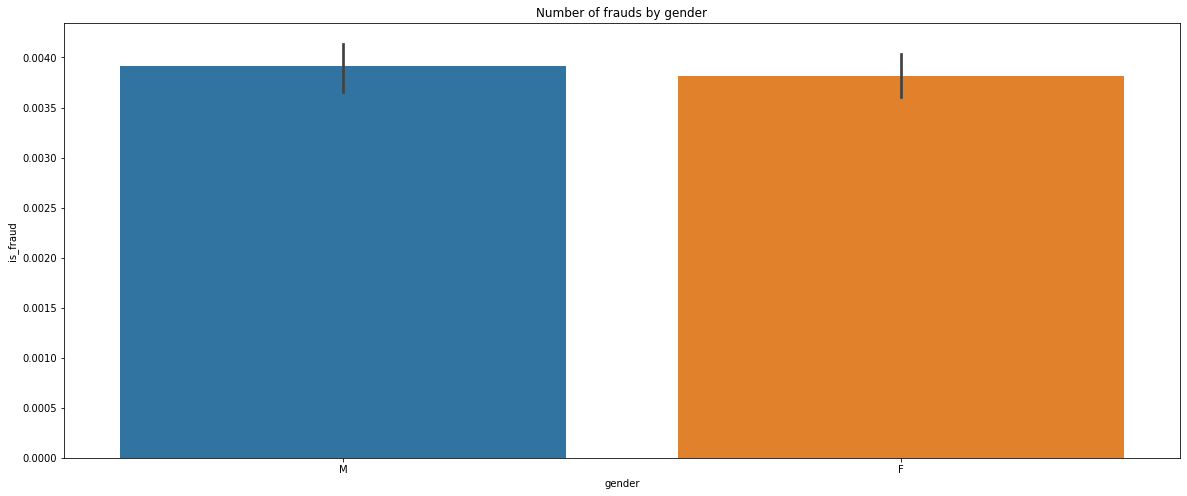

In [8]:
# Gender
plt.figure(figsize=(20,8))
plt.title('Number of frauds by gender')
sns.barplot(x="gender", y='is_fraud' ,data=cc_original_train_df)

<AxesSubplot:title={'center':'Number of frauds by category'}, xlabel='category', ylabel='is_fraud'>

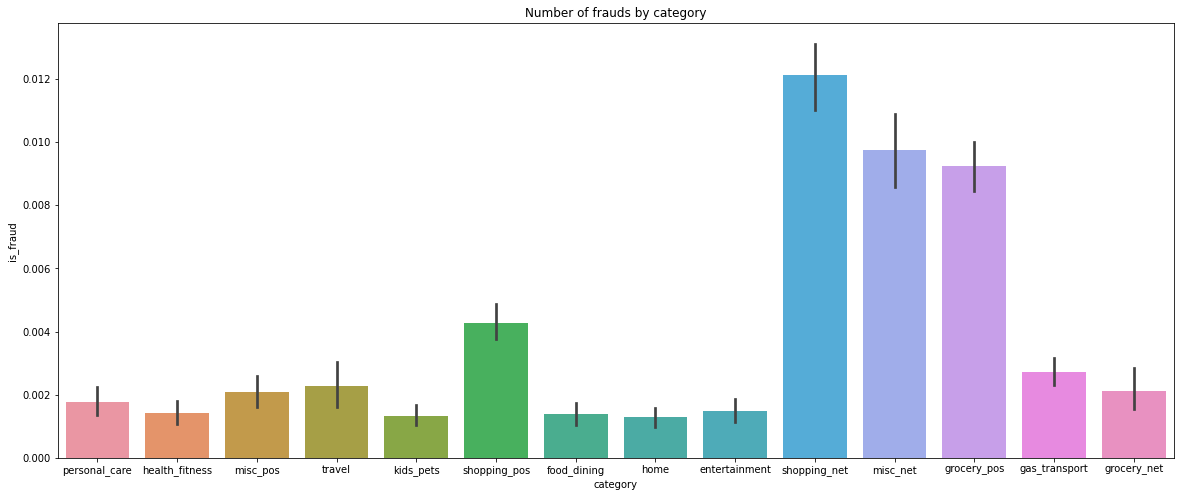

In [9]:
# Category
plt.figure(figsize=(20,8))
plt.title('Number of frauds by category')
sns.barplot(x="category", y='is_fraud' ,data=cc_original_train_df)

### Answers
3. What is gender that has been scammed the most?: **Male**
4. What type of category that has been scammed the most?: **shopping_net**

# Pre-Processing
## Downsampling Data
Use downsampling solution because targets are imbalance data

In [10]:
print("Number of is_fraud data",cc_original_train_df['is_fraud'].value_counts())

Number of is_fraud data 0    553574
1      2145
Name: is_fraud, dtype: int64


is_fraud = 0 has 1289169 data

is_fraud = 1 has 7506 data

Amount of is_fraud is very different, it can make overfitting

In [11]:
from sklearn.utils import resample 
df_minority = cc_original_train_df[cc_original_train_df.iloc[:,22].values==0] # .iloc[:,22] = is_fraud
df_majority = cc_original_train_df[cc_original_train_df.iloc[:,22].values==1] 
 
# Downsample majority class
df_minority_downsampled = resample(df_minority,
                                 n_samples=7506,     # to match minority class
                                 random_state=42)    # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_minority_downsampled, df_majority])
 
# Display new class counts
df_downsampled.info()

IndexError: single positional indexer is out-of-bounds

In [ ]:
print("Number of is_fraud data",df_downsampled['is_fraud'].value_counts())

Note: Now is_fraud = 0 and is_fruad = 1 have amount = 7506 both

# Data Tranformation
## Transaction date time
Add new columns week_number, month_number, year by trandform data fromtrans_date_trans_time feature

### Train Data

In [ ]:
# Train data
# Change date to be date type
df_downsampled['trans_date_trans_time'] = pd.to_datetime(df_downsampled['trans_date_trans_time'])
# Create column week number
df_downsampled['week_number'] = df_downsampled['trans_date_trans_time'].dt.dayofweek
assert df_downsampled['week_number'].max() == 6
# Create column month number
df_downsampled['month_number'] = df_downsampled['trans_date_trans_time'].dt.month
assert df_downsampled['month_number'].max() == 12
# Create column year
df_downsampled['year'] = df_downsampled['trans_date_trans_time'].dt.year
df_downsampled.head()

### Test Data

In [ ]:
# Test Data
# Change date to be date type
cc_original_test_df['trans_date_trans_time'] = pd.to_datetime(cc_original_test_df['trans_date_trans_time'])
# Create column week number
cc_original_test_df['week_number'] = cc_original_test_df['trans_date_trans_time'].dt.dayofweek
assert cc_original_test_df['week_number'].max() == 6
# Create column month number
cc_original_test_df['month_number'] = cc_original_test_df['trans_date_trans_time'].dt.month
assert cc_original_test_df['month_number'].max() == 12
# Create column year
cc_original_test_df['year'] = cc_original_test_df['trans_date_trans_time'].dt.year
cc_original_test_df.head()

## Category (One-Hot Endcoding)
Category is Nominal Data that cannot work with model,So I will change category to numerical by One Hot Encoding

### Train Data

In [ ]:
category_onehot = pd.get_dummies(df_downsampled.category, prefix='category')
df_downsampled = df_downsampled.join(category_onehot)
df_downsampled.head()

### Test Data

In [ ]:
category_onehot_test_data = pd.get_dummies(cc_original_test_df.category, prefix='category')
cc_original_test_df = cc_original_test_df.join(category_onehot_test_data)
cc_original_test_df.head()

## Gender
Change gender from nominal to numerical

In [ ]:
# Train data
df_downsampled['gender'] = df_downsampled['gender'].replace(['F','M'],[0,1])
# Test data
cc_original_test_df['gender'] = cc_original_test_df['gender'].replace(['F','M'],[0,1])

print('Gender of train dataset', df_downsampled['gender'].value_counts())
print('Gender of test dataset', cc_original_test_df['gender'].value_counts())

## Merchant
Convert Marchant to be numerical data

In [ ]:
# Train data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x_train = df_downsampled['merchant']
df_downsampled['merchant_number'] = label_encoder.fit_transform(x_train)

# Test data
x_test = cc_original_test_df['merchant']
cc_original_test_df['merchant_number'] = label_encoder.fit_transform(x_test)

print('Merchant Number of train dataset',df_downsampled['merchant_number'])
print('Merchant Number of test dataset',cc_original_test_df['merchant_number'])

## Age
Find Age from date of birth data

In [ ]:
from datetime import date
def calculate_age(row):
    today = date.today()
    return today.year - row['dob'].year - ((today.month, today.day) < (row['dob'].month, row['dob'].day))

# Train data
df_downsampled['dob'] = pd.to_datetime(df_downsampled['dob'])
df_downsampled['age'] = df_downsampled['dob']
df_downsampled['age'] = df_downsampled.apply (lambda row: calculate_age(row), axis=1)

# Test data
cc_original_test_df['dob'] = pd.to_datetime(cc_original_test_df['dob'])
cc_original_test_df['age'] = cc_original_test_df['dob']
cc_original_test_df['age'] = cc_original_test_df.apply (lambda row: calculate_age(row), axis=1)

print('Age of train dataset', df_downsampled['age'].head(3))
print('Age of test dataset', cc_original_test_df['age'].head(3))

### Job
Convert Marchant to be numerical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Train data
x_train = df_downsampled['job']
df_downsampled['job_number'] = label_encoder.fit_transform(x_train)
print(df_downsampled['job_number'])

# Test data
x_test = cc_original_test_df['job']
cc_original_test_df['job_number'] = label_encoder.fit_transform(x_test)
print(cc_original_test_df['job_number'])

# Select Data
For select features I would like to do 2 experiments: ExtraTreesClassifier, .abs().nlargest(), because i would like to find the best acurrency and the best prediction

So, This project I will try and compare for my reader

In [ ]:
# Unselect converted data
select_data = df_downsampled
select_data.columns

In [ ]:
select_data = select_data[['cc_num',
       'amt', 'gender', 'zip',
       'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'age', 'job_number',
       'week_number', 'month_number', 'year', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'merchant_number','is_fraud']]
select_data.head()

## ExtraTreesClassifier

In [ ]:
X = select_data.iloc[:,0:31]  #independent columns
y = select_data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## nlargest

In [ ]:
print(select_data.corr().abs().nlargest(15, 'is_fraud').index)

In [ ]:
#Select Train Data
select_data_train_extra_tree = df_downsampled[['amt','category_shopping_net','category_grocery_pos','category_home','category_misc_net',
                                         'category_kids_pets','category_health_fitness','gender','age','month_number',
                                         'category_food_dining','unix_time','category_personal_care','category_shopping_pos','is_fraud']]

select_data_train_abs_nlargest = df_downsampled[['amt', 'category_shopping_net', 'category_grocery_pos',
                                        'category_home', 'category_misc_net', 'category_kids_pets',
                                        'category_health_fitness', 'category_food_dining',
                                        'category_personal_care', 'month_number', 'category_entertainment',
                                        'age', 'category_misc_pos', 'gender','is_fraud']]

In [ ]:
#Select Test Data
select_data_test_extra_tree = cc_original_test_df[['amt','category_shopping_net','category_grocery_pos','category_home','category_misc_net',
                                         'category_kids_pets','category_health_fitness','gender','age','month_number',
                                         'category_food_dining','unix_time','category_personal_care','category_shopping_pos','is_fraud']]

select_data_test_abs_nlargest = cc_original_test_df[['amt', 'category_shopping_net', 'category_grocery_pos',
                                        'category_home', 'category_misc_net', 'category_kids_pets',
                                        'category_health_fitness', 'category_food_dining',
                                        'category_personal_care', 'month_number', 'category_entertainment',
                                        'age', 'category_misc_pos', 'gender','is_fraud']]

In [ ]:
# Prepare X_train y_train
X_train_extra_tree = select_data_train_extra_tree[['amt','category_shopping_net','category_grocery_pos','category_home','category_misc_net',
                                         'category_kids_pets','category_health_fitness','gender','age','month_number',
                                         'category_food_dining','unix_time','category_personal_care','category_shopping_pos']]
y_train_extra_tree = select_data_train_extra_tree['is_fraud']

X_train_abs_nlargest = select_data_train_abs_nlargest[['amt', 'category_shopping_net', 'category_grocery_pos',
                                        'category_home', 'category_misc_net', 'category_kids_pets',
                                        'category_health_fitness', 'category_food_dining',
                                        'category_personal_care', 'month_number', 'category_entertainment',
                                        'age', 'category_misc_pos', 'gender']]
y_train_abs_nlargest = select_data_train_abs_nlargest['is_fraud']

In [ ]:
# Prepare X_test y_test
X_test_extra_tree = select_data_test_extra_tree[['amt','category_shopping_net','category_grocery_pos','category_home','category_misc_net',
                                         'category_kids_pets','category_health_fitness','gender','age','month_number',
                                         'category_food_dining','unix_time','category_personal_care','category_shopping_pos']]
y_test_extra_tree = select_data_test_extra_tree['is_fraud']

X_test_abs_nlargest = select_data_test_abs_nlargest[['amt', 'category_shopping_net', 'category_grocery_pos',
                                        'category_home', 'category_misc_net', 'category_kids_pets',
                                        'category_health_fitness', 'category_food_dining',
                                        'category_personal_care', 'month_number', 'category_entertainment',
                                        'age', 'category_misc_pos', 'gender']]
y_test_abs_nlargest = select_data_test_abs_nlargest['is_fraud']

# Scaler Data

In [ ]:
from sklearn import preprocessing

### Scaler Train Data

In [ ]:
# Scale X_train
# Extra Tree
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_train_extra_tree)
X_train_extra_tree_scaler = pd.DataFrame(newValue, columns=X_train_extra_tree.columns)
X_train_extra_tree_scaler

In [ ]:
# Abs
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_train_abs_nlargest)
X_train_abs_nlargest_scaler = pd.DataFrame(newValue, columns=X_train_abs_nlargest.columns)
X_train_abs_nlargest_scaler

### Scaler Test Data

In [ ]:
# Scale X_test
# Extra Tree
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_test_extra_tree)
X_test_extra_tree_scaler = pd.DataFrame(newValue, columns=X_test_extra_tree.columns)
X_test_extra_tree_scaler

In [ ]:
# nlargest
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_test_abs_nlargest)
X_test_abs_nlargest_scaler = pd.DataFrame(newValue, columns=X_test_abs_nlargest.columns)
X_test_abs_nlargest_scaler

# Model
## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Extra Tree
model_ext = LogisticRegression(random_state=42)
model_ext.fit(X_train_extra_tree_scaler, y_train_extra_tree)

# nlargest
model_nr = LogisticRegression(random_state=42)
model_nr.fit(X_train_abs_nlargest_scaler, y_train_abs_nlargest)

In [ ]:
# Extra Tree - Predict
y_pred_extra_tree_scaler = model_ext.predict(X_test_extra_tree_scaler)

# nlargest - Predict
y_pred_abs_nlargest_scaler = model_nr.predict(X_test_abs_nlargest_scaler)

In [ ]:
# Extra Tree - Confusion matrix
print("Select Data By Extra Tree")
print(pd.DataFrame(confusion_matrix(y_test_extra_tree,y_pred_extra_tree_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative']))

# nlargest - Confusion matrix
print("Select Data By Abs nlargest")
print(pd.DataFrame(confusion_matrix(y_test_abs_nlargest,y_pred_abs_nlargest_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative']))

In [ ]:
# Extra Tree - Classification Report
print("Classification report (Select Data By Extra Tree)")
print(classification_report(y_test_extra_tree, y_pred_extra_tree_scaler))

# nlargest - Classification Report
print("Classification report (Select Data By Abs nlargest)")
print(classification_report(y_test_abs_nlargest, y_pred_abs_nlargest_scaler))

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=42)

# Extra Tree - Fit Model
dt_clf.fit(X_train_extra_tree_scaler, y_train_extra_tree)

# nlargest - Fit Model
dt_clf.fit(X_train_abs_nlargest_scaler, y_train_abs_nlargest)

In [ ]:
#Extra Tree - Confusion matrix
print("Confusion Matrix(Select Data By Extra Tree)")
pred_test_extrea_tree_scaler = dt_clf.predict(X_test_extra_tree_scaler)
pd.DataFrame(confusion_matrix(y_test_extra_tree,pred_test_extrea_tree_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative'])

In [ ]:
# nlargest - Confusion matrix
print("Confusion Matrix(Select Data By Abs nlargest)")
pred_test_abs_nlargest_scaler = dt_clf.predict(X_test_abs_nlargest_scaler)
pd.DataFrame(confusion_matrix(y_test_abs_nlargest,pred_test_abs_nlargest_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative'])

In [ ]:
# Extra Tree - Classification report
print("Classification report (Select Data By Extra Tree)")
print(classification_report(y_test_extra_tree, pred_test_extrea_tree_scaler))


# nlargest - Classification report
print("Classification report (Select Data By nlargest)")
print(classification_report(y_test_abs_nlargest, pred_test_abs_nlargest_scaler))

## Conclusion
The best accuracy from 4 models is a Decision Tree and Selection data is nlargest has 95% 
and has the best True Positive but for True Negative has value less than LogisticRegression but f1-score has a little different. So, Decision Tree and Selection data is nlargest medel is the best in this project.
